In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [2]:
data_path = "data/"

ADNI1_Complete_1Yr = pd.read_csv(data_path + "ADNI1_Complete_1Yr_1.5T_10_06_2024.csv")
ADNI1_Complete_1Yr.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I88024,016_S_0991,AD,F,87,m12,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,12/13/2007,NiFTI,NaN
1,I32237,011_S_0003,AD,M,81,sc,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/01/2005,NiFTI,NaN
2,I80689,116_S_0487,AD,M,78,m12,MRI,MPR; GradWarp; N3; Scaled,Processed,6/18/2007,NiFTI,NaN
3,I58022,051_S_1296,AD,M,77,sc,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/12/2007,NiFTI,NaN
4,I112461,141_S_0852,AD,F,85,m06,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,4/25/2007,NiFTI,NaN


In [3]:
ADNI1_Complete_1Yr.describe()

,Age,Downloaded
count,2294.000000,0.0
mean,75.638622,NaN
std,6.662227,NaN
min,55.000000,NaN
25%,72.000000,NaN
50%,76.000000,NaN
75%,80.000000,NaN
max,91.000000,NaN


# Plot AD vs CN sample values

In [4]:
ADNI1_Complete_1Yr["Group"].value_counts()

Group
MCI    1113
CN      705
AD      476
Name: count, dtype: int64

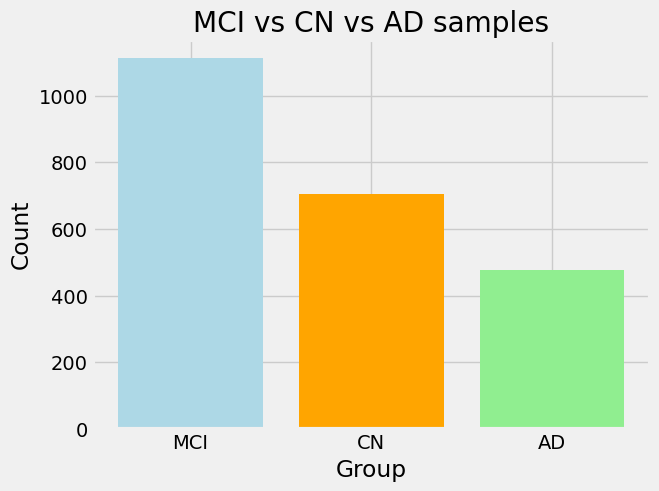

In [33]:
plt.style.use('fivethirtyeight')
plt.subplot()

plt.bar(ADNI1_Complete_1Yr["Group"].value_counts().index, 
        ADNI1_Complete_1Yr["Group"].value_counts().values,
        color=['lightblue', 'orange', "lightgreen"])
# Add title and labels
plt.title('MCI vs CN vs AD samples')
plt.xlabel('Group')
plt.ylabel('Count')

#Save figure
plt.savefig("MCIvsCNvsADcounts.pdf", format="pdf", bbox_inches="tight")

# Display the plot
plt.show()

# Plot Age Distribution

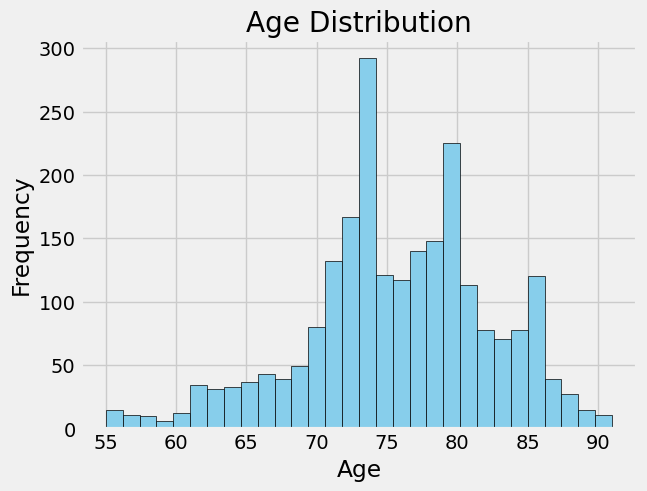

In [34]:
# Plot the histogram for the 'Age' column
plt.hist(ADNI1_Complete_1Yr['Age'], bins=30, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.savefig("age_distribution.pdf", format="pdf", bbox_inches="tight")

# Display the plot
plt.show()

## Plot Age Distribution again with it split with groups

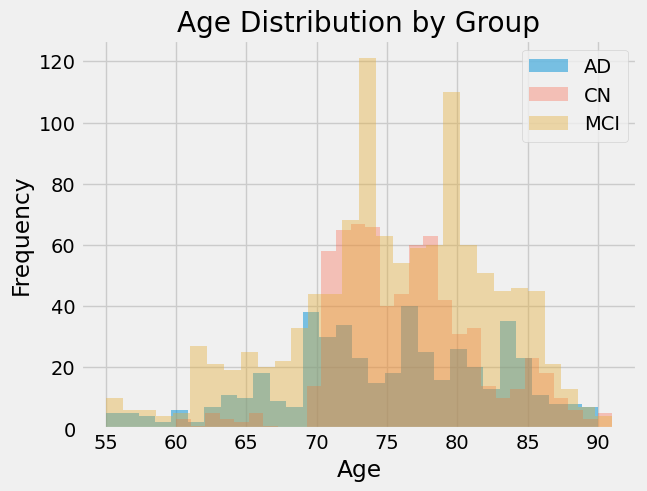

In [35]:
plt.hist(ADNI1_Complete_1Yr[ADNI1_Complete_1Yr['Group'] == 'AD']['Age'], alpha=0.5, label='AD', bins=30)
plt.hist(ADNI1_Complete_1Yr[ADNI1_Complete_1Yr['Group'] == 'CN']['Age'], alpha=0.3, label='CN', bins=30)
plt.hist(ADNI1_Complete_1Yr[ADNI1_Complete_1Yr['Group'] == 'MCI']['Age'], alpha=0.4, label='MCI', bins=30)
plt.title('Age Distribution by Group')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("age_distribution_by_group.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Plot Group vs Sex Distribution

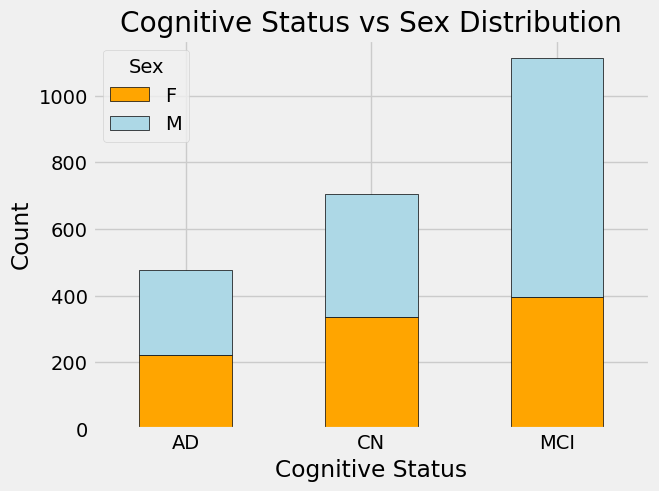

In [36]:
# Distribution of AD with age AND gender
pd.crosstab(ADNI1_Complete_1Yr['Group'], ADNI1_Complete_1Yr['Sex']).plot(kind='bar', stacked=True, color=['orange', 'lightblue'], edgecolor='black')

# Add title and labels
plt.title('Cognitive Status vs Sex Distribution')
plt.xlabel('Cognitive Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.savefig("cognitive_status_by_gender.pdf", format="pdf", bbox_inches="tight")

# Display the plot
plt.show()

## Sex Distribution

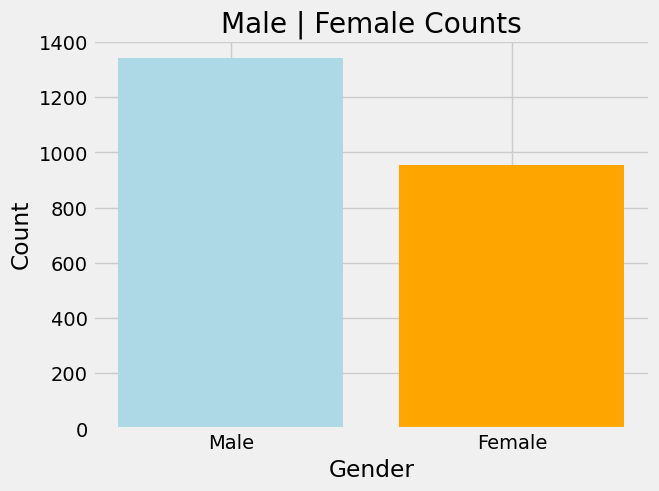

In [37]:
male_count = len(ADNI1_Complete_1Yr[ADNI1_Complete_1Yr['Sex'] == 'M'])
female_count = len(ADNI1_Complete_1Yr[ADNI1_Complete_1Yr['Sex'] == 'F'])

plt.subplot()

plt.bar(['Male', 'Female'],
        [male_count, female_count],
        color=['lightblue', 'orange'])

plt.title('Male | Female Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig("age_distribution.pdf", format="pdf", bbox_inches="tight")
plt.show();

# Plot Age Distribution by Group

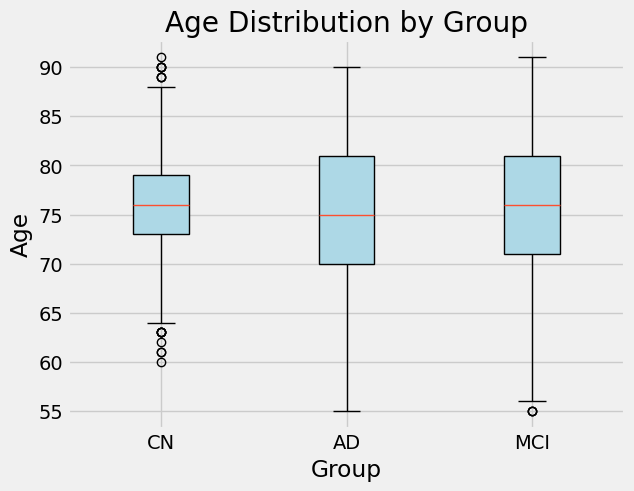

In [38]:
# Create a box plot for Age by Group
plt.boxplot([ADNI1_Complete_1Yr[ADNI1_Complete_1Yr['Group'] == 'CN']['Age'], 
             ADNI1_Complete_1Yr[ADNI1_Complete_1Yr['Group'] == 'AD']['Age'],
            ADNI1_Complete_1Yr[ADNI1_Complete_1Yr['Group'] == 'MCI']['Age']],
            tick_labels=['CN', 'AD', 'MCI'], patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Add title and labels
plt.title('Age Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Age')

plt.savefig("age_distribution_by_group.pdf", format="pdf", bbox_inches="tight")

# Display the plot
plt.show()

# Plot the Distribution of Acquisition Dates

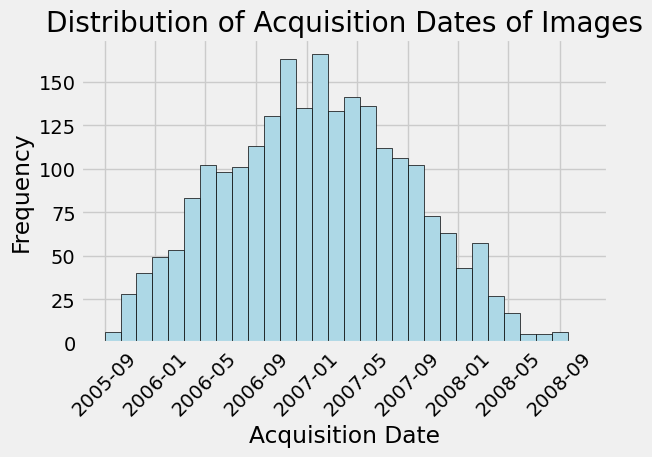

In [39]:
# Convert 'Acq Date' to datetime format
ADNI1_Complete_1Yr['Acq Date'] = pd.to_datetime(ADNI1_Complete_1Yr['Acq Date'])

# Plot the histogram of acquisition dates
plt.hist(ADNI1_Complete_1Yr['Acq Date'], bins=30, color='lightblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Acquisition Dates of Images')
plt.xlabel('Acquisition Date')
plt.ylabel('Frequency')


plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("acquisition_dates.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [40]:
import numpy as np
age_mean = ADNI1_Complete_1Yr['Age'].mean()
age_1srd = np.std(ADNI1_Complete_1Yr['Age'])
age_mean, age_1srd

(75.6386224934612, 6.660774650101966)

## Count how many scans subjects have

In [41]:
len(ADNI1_Complete_1Yr['Subject'].unique())

639